In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Декартово произведение множеств

In [ ]:
import itertools
lists = [[1, 2, 3],
         ['A', 'B'],
         ['*','#']]

result = list(itertools.product(*lists))
print(result)

[(1, 'A', '*'), (1, 'A', '#'), (1, 'B', '*'), (1, 'B', '#'), (2, 'A', '*'), (2, 'A', '#'), (2, 'B', '*'), (2, 'B', '#'), (3, 'A', '*'), (3, 'A', '#'), (3, 'B', '*'), (3, 'B', '#')]


# Последовательность бросаний монеты - декартово произведение (0,1)

In [ ]:
# варианты бросаний 4-х монет = 4-х разовое бросание монеты
numb_bin_res = list(itertools.product((0,1), (0,1), (0,1), (0,1)))
numb_bin_res

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

In [57]:
def numb_res_coin(n):
  '''
  Функция возвращает число выпадений решки
  при бросании монеты n раз
  '''
  return np.random.randint(0,2,n).sum()/n

In [58]:
# numpy вектоирзация функции
vek_numb_res_coin = np.vectorize(numb_res_coin)

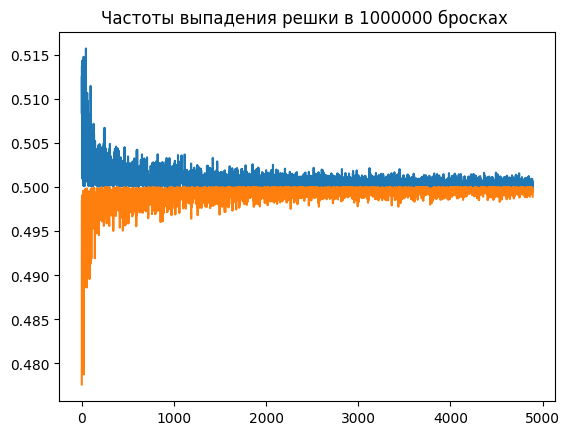

In [83]:
n = 1000_000
X = np.arange(1,n+1,100)
vek_numb_res_coin_X_0_6 = np.fromiter((element for element in vek_numb_res_coin(X) if element > 0.5), dtype = vek_numb_res_coin(X).dtype)# vek_numb_res_coin(X)[vek_numb_res_coin(X)>0.5]
vek_numb_res_coin_X_0_4 = np.fromiter((element for element in vek_numb_res_coin(X) if element < 0.5), dtype = vek_numb_res_coin(X).dtype)

m = min(len(vek_numb_res_coin_X_0_6), len(vek_numb_res_coin_X_0_4))
X1 = np.arange(m)

plt.plot(X1[1:m],vek_numb_res_coin_X_0_6[1:m])# вектор частот больших 0.5
plt.plot(X1[1:m],vek_numb_res_coin_X_0_4[1:m])# вектор частот меньших 0.5
plt.title(f'Частоты выпадения решки в {n} бросках ')
plt.show();

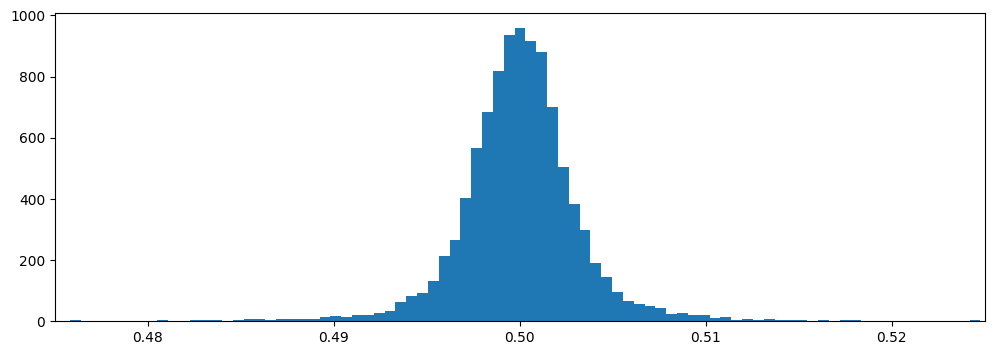

In [100]:
n = 100_000
X = np.arange(1,n+1,10)

plt.figure(figsize=(12,4))
plt.hist(vek_numb_res_coin(X), bins = 1000)
plt.xlim(xmin = 0.475, xmax = 0.525)
plt.show();

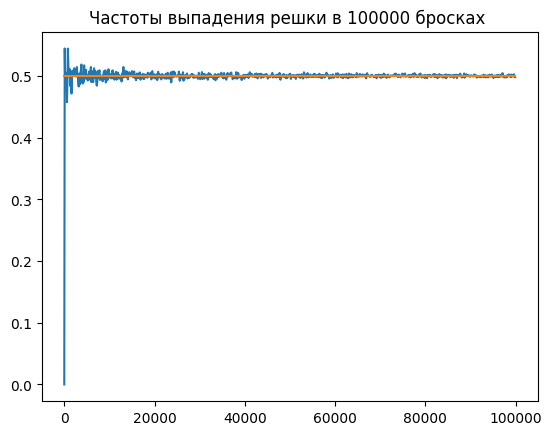

In [65]:
n = 100_000
X = np.arange(1,n+1,100)

plt.plot(X,vek_numb_res_coin(X))#, 'r.')
plt.plot(X,0.5+np.zeros(n//100))
plt.title(f'Частоты выпадения решки в {n} бросках ')
plt.show();

In [ ]:
# Какова вероятность получить одинаковое количество решек и орлов,
# если монетка бросается четыре раза (с учётом порядка подбрасываний)?
[elem for elem in numb_bin_res if sum(elem) == 2]

[(0, 0, 1, 1),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 1, 0, 0)]

In [ ]:
6/16

0.375

In [ ]:
[elem for elem in numb_bin_res if (sum(elem) == 0) | (sum(elem) == 4)]

[(0, 0, 0, 0), (1, 1, 1, 1)]

In [ ]:
1/8

0.125

# Одновременное бросаний кости - декартово произведение (1,2,3,4,5,6)

In [ ]:
# словарь для подсчета суммы результатов выпадения 2-х костей
numb_bin_res_6 = list(itertools.product(range(1,7), range(1,7)))
dct = dict()
for elem in numb_bin_res_6:
    if sum(elem) not in dct.keys():
        dct[sum(elem)] = 1
    else:
        dct[sum(elem)] += 1
dct

{2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}

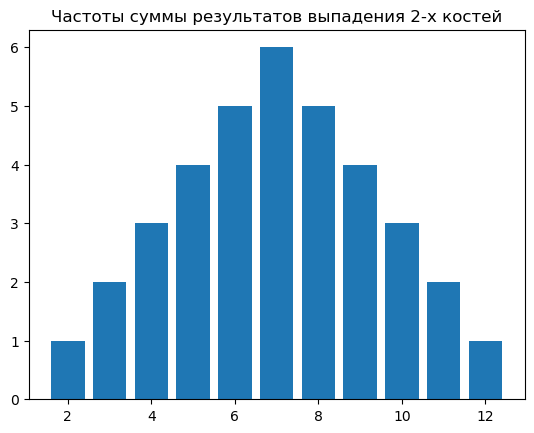

In [ ]:
# строим график частот суммы результатов выпадения 2-х костей

import matplotlib.pyplot as plt

plt.bar(dct.keys(),dct.values())
plt.title('Частоты суммы результатов выпадения 2-х костей')
plt.show();

# Функция для подсчета частоты суммы  результатов выпадения n костей

In [ ]:
def numb_bin_res_6(n=2):
    '''
     Функция считает суммы результатов выпадения n костей и
     строит гистограмму частот результатов
    '''
    numb_bin_res_6 = [range(1,7)] * n # генерация n костей
    numb_bin_res_6 = list(itertools.product(*(numb_bin_res_6))) #строим комбинации выпадения n костей
    dct = dict()
    for elem in numb_bin_res_6:
        if sum(elem) not in dct.keys():
            dct[sum(elem)] = 1
        else:
            dct[sum(elem)] += 1
    print(dct)
    plt.bar(dct.keys(),dct.values())
    plt.title(f'Частоты суммы результатов выпадения {n}-х костей')
    plt.show();

{8: 1, 9: 8, 10: 36, 11: 120, 12: 330, 13: 792, 14: 1708, 15: 3368, 16: 6147, 17: 10480, 18: 16808, 19: 25488, 20: 36688, 21: 50288, 22: 65808, 23: 82384, 24: 98813, 25: 113688, 26: 125588, 27: 133288, 28: 135954, 29: 133288, 30: 125588, 31: 113688, 32: 98813, 33: 82384, 34: 65808, 35: 50288, 36: 36688, 37: 25488, 38: 16808, 39: 10480, 40: 6147, 41: 3368, 42: 1708, 43: 792, 44: 330, 45: 120, 46: 36, 47: 8, 48: 1}


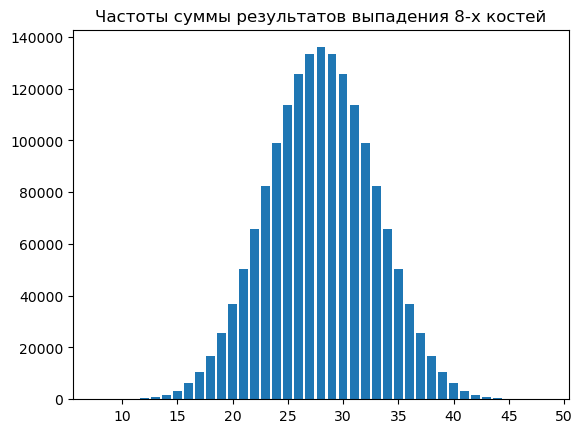

CPU times: total: 2.36 s
Wall time: 2.46 s


In [ ]:
%%time
numb_bin_res_6(8)